In [2]:
# in this project
# learn about brain
# many concepts and chanlenging
# computational neuroscience 

In [3]:
# simulate one brain cell

import numpy as np
import matplotlib.pyplot as plt

In [5]:
a = .02
b = .2
c =-50
d = 2

v = -65
u = b*v


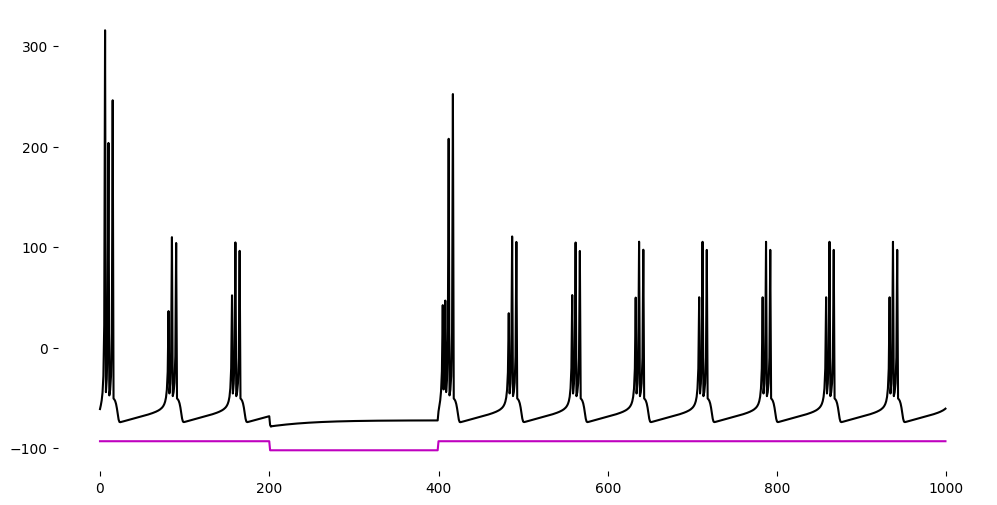

In [6]:
simulation_time = 1000
memvolt = np.zeros(simulation_time)
Iall = np.zeros(simulation_time)

for t in range(simulation_time):
    #define the input strength
    I = -2 if (t > 200) & (t< 400) else 7
        
    
    #check of there is an action potential
    if v>= 30:
        v = c
        u = u + d
        
        
    # update the menbrane variable
    v += 0.04*v**2 + 5*v + 140 - u + I
    u += a*(b*v -u)
    
    #collect the variables for subsequen plotting
    memvolt[t] = v
    Iall[t] = I
    

# plotting
fig, ax = plt.subplots(1, figsize = (12,6))

plt.plot(memvolt , 'k', label = "Membrane potential")
plt.plot(Iall -100, 'm', label = 'Stimulation')
plt.box(False)
plt.show()


In [14]:
# build circuit of 1000 neurons
# Excitatory cells                              Inhibit cells

Ne = 800;                                       Ni = 200
re1 = np.random.rand(Ni)**2;                    ri = np.random.rand(Ni)
re2 = np.random.rand(Ni)**2;                    ri = np.random.rand(Ni)

a = np.hstack((.02*np.ones(Ne),                 0.2+0.8*ri))




In [12]:
Se

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])